<center>
    <h1>🎬 Movie Rating Prediction with Python</h1>
    <p><h3>Task No.1, Codsoft Data Science Internship</h3></p>
</center>

# Aim - 
##### To create a Linear Regression model which predicts movie rating based on features like genre, director, and actors.

<center>
    <h1>Installing and Importing Necessary Libraries / Requirements</h1>
</center>

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install tensorflow
!pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<center>
    <h1>Dataset Loading</h1>
</center>

In [2]:
df = pd.read_csv(r"C:\Users\Nishs\Downloads\Codsoft - Intership - Movie Rating Predicition\IMDb Movies India.csv", encoding='ISO-8859-1') # Read the CSV file

<center>
<h1>Exploratory Data Analysis (EDA) And Key Achievements</h1>
</center>

In [3]:
print(df.head()) # Check the first few rows

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
df.shape # Check the shape of the dataset

(15509, 10)

In [5]:
df.info() # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.isna().sum() # Check for missing values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.duplicated().sum() # Check for duplicate rows

np.int64(6)

In [8]:
df.dropna(inplace=True) # Drop rows with missing values
df.drop_duplicates(inplace=True) # Drop duplicate rows

In [9]:
df.isna().sum() # Check for missing values

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
df.duplicated().sum() # Check for duplicate rows

np.int64(0)

In [11]:
df.shape

(5659, 10)

In [12]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [13]:
#Convert into correct data types
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int) # converting year into int as in the given data it is in string format
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', '')) # converting duration into int as in the given data it is in string format
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', '')) # converting votes into int as in the given data it is in string format

In [14]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


<center>
<h1>Data Distribution and Visualization</h1>
</center>

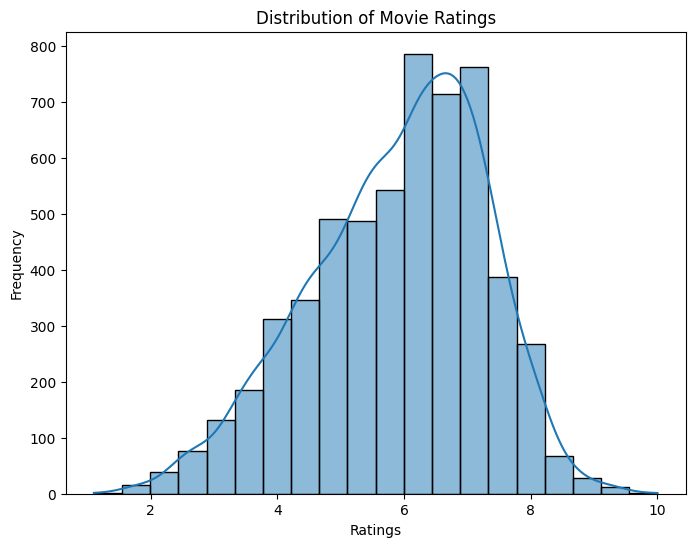

In [16]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

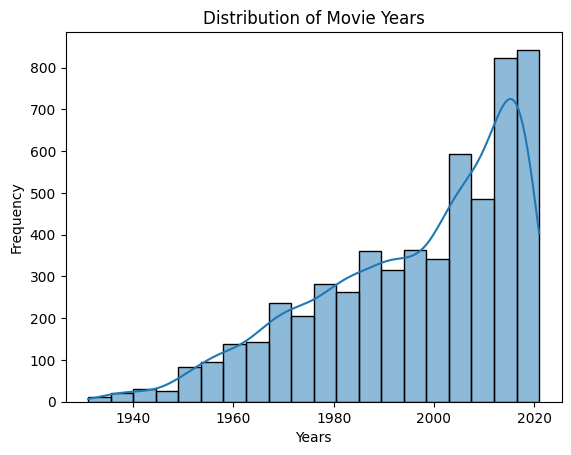

In [17]:
# Distribution of Movie Years
plt.Figure(figsize=(8, 6))
sns.histplot(df['Year'], kde=True, bins=20)
plt.title("Distribution of Movie Years")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

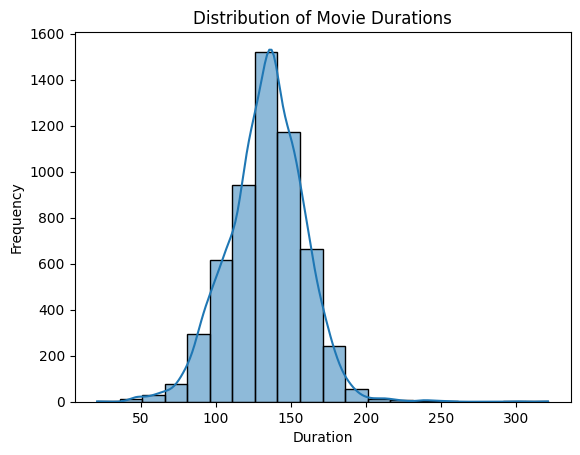

In [18]:
# Distribution of Movie Duration
plt.Figure(figsize=(8, 6))
sns.histplot(df['Duration'], kde=True, bins=20)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

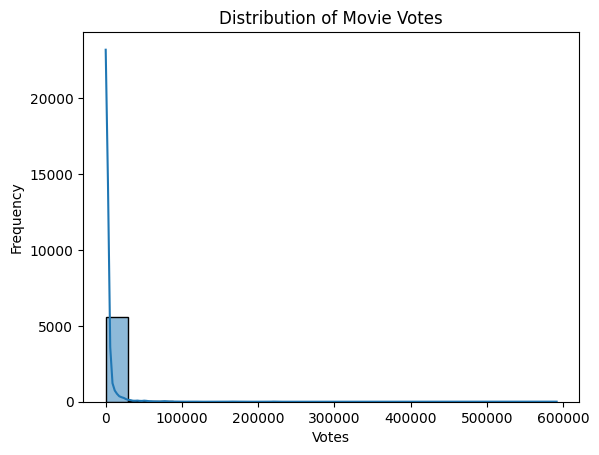

In [19]:
# Distribution of Votes
plt.Figure(figsize=(8, 6))
sns.histplot(df['Votes'], kde=True, bins=20)
plt.title("Distribution of Movie Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Drop irrelevant columns
df.drop(columns=["ID", "Name"], errors="ignore", inplace=True)

In [21]:
# Data Cleaning : Handle Missing and Incorrec values
df["Duration"] = df["Duration"].astype(str).str.extract(r"(\d+)") # Extract the numeric part
df["Duration"] = pd.to_numeric(df["Duration"], errors='coerce') # Convert to numeric
df["Duration"].fillna(df["Duration"].median(), inplace=True) # Fill missing values with median

df["Year"] = pd.to_numeric(df["Year"], errors='coerce') # Convert to numeric
df["Year"].fillna(df["Year"].median(), inplace=True) # Fill missing values with median

df["Votes"] = pd.to_numeric(df["Votes"], errors='coerce') # Convert to numeric
df["Votes"].fillna(df["Votes"].median(), inplace=True) # Fill missing values with median

C:\Users\Nishs\AppData\Local\Temp\ipykernel_2340\104258176.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Duration"].fillna(df["Duration"].median(), inplace=True) # Fill missing values with median
C:\Users\Nishs\AppData\Local\Temp\ipykernel_2340\104258176.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [22]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'] # List of categorical columns to encode using LabelEncoder

for col in categorical_columns:
    df[col] = df[col].astype(str)  # Convert to string
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [23]:
# Define target variable and features
X = df.drop(columns=["Rating"])  # Features
y = pd.to_numeric(df["Rating"], errors="coerce")  # Ensure target variable is numeric
y.fillna(y.median(), inplace=True)  # Fill missing ratings with median

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training, 20% for testing

In [25]:
# Scale the features
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler() # Initialize StandardScaler
X_train = scaler.fit_transform(X_train) # Fit and transform training data
X_test = scaler.transform(X_test) # Transform testing data

In [26]:
# Check for NaN and Inf values in X_test and y_test
print("NaN values in X_test:", np.isnan(X_test).sum()) # NaN values in X_test
print("NaN values in y_test:", np.isnan(y_test).sum()) # NaN values in y_test
print("Inf values in X_test:", np.isinf(X_test).sum()) # Inf values in X_test
print("Inf values in y_test:", np.isinf(y_test).sum()) # Inf values in y_test

NaN values in X_test: 0
NaN values in y_test: 0
Inf values in X_test: 0
Inf values in y_test: 0


In [27]:
# Ensure no NaN or Inf values in X_test and y_test
X_test = np.nan_to_num(X_test) # Replace NaN values with 0
y_test = np.nan_to_num(y_test) # Replace NaN values with 0

In [28]:
# Drop any remaining NaN rows in X_test
mask = np.isnan(X_test).any(axis=1) # Check for NaN values in each row
X_test = X_test[~mask] # Drop rows with NaN values
y_test = y_test[~mask] # Drop corresponding rows in y_test

In [29]:
print("Final X_test NaN count:", np.isnan(X_test).sum()) # NaN values in X_test

Final X_test NaN count: 0


In [30]:
# Build Neural Network Model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)), # Input layer
    Dense(32, activation="relu"), # Hidden layer
    Dense(1, activation="linear")  # Linear activation for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"]) # Mean Absolute Error

C:\Users\Nishs\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1) # Verbose=1 for progress updates during training

Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.9944 - mae: 3.0562 - val_loss: 2.5189 - val_mae: 1.2477
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5178 - mae: 1.2875 - val_loss: 2.1611 - val_mae: 1.1632
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1653 - mae: 1.1579 - val_loss: 1.8962 - val_mae: 1.1044
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9538 - mae: 1.1137 - val_loss: 1.7860 - val_mae: 1.0772
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7652 - mae: 1.0512 - val_loss: 1.6700 - val_mae: 1.0360
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6859 - mae: 1.0220 - val_loss: 1.5830 - val_mae: 0.9866
Epoch 7/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6271 - mae: 0.9895 - val_loss: 1.5295 - val_mae: 0.9679
Epoch 8/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5020 - mae: 0.9509 - val_loss: 1.5808 - val_mae: 0.9984
Epoch 9/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

In [32]:
# Predictions
y_pred = model.predict(X_test).flatten() # Flatten the predictions

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [33]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # R^2 Score

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}") # Print evaluation metrics

MAE: 0.95, MSE: 1.46, RMSE: 1.21, R² Score: 0.21


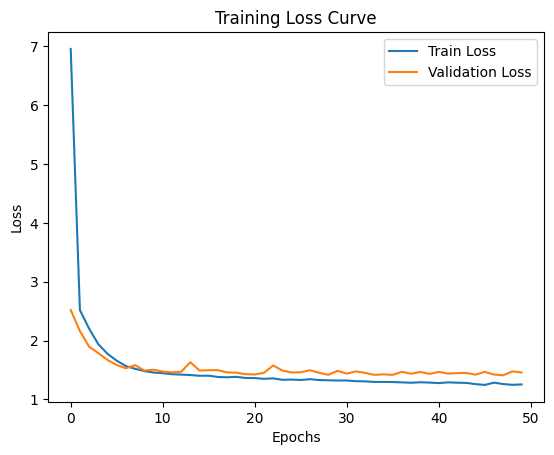

In [34]:
# Visualization - Loss Curve
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curve")
plt.show()

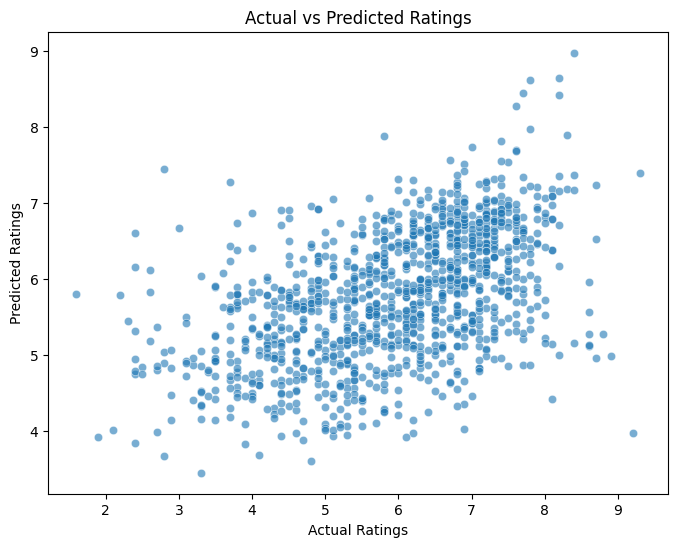

In [35]:
# Scatter Plot: Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

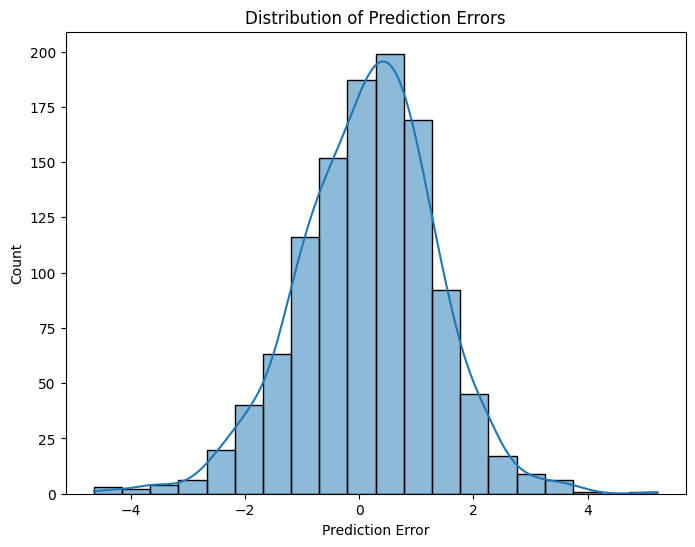

In [36]:
# Histogram of Errors
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.show()

In [37]:
# Define an acceptable threshold for accuracy (e.g., ±0.5)
threshold = 0.5
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold) # Calculate accuracy

print(f"Accuracy (within ±{threshold}): {accuracy * 100:.2f}%")

Accuracy (within ±0.5): 31.98%


<center>
<h1>Creating confusion matrix</h1>
</center>

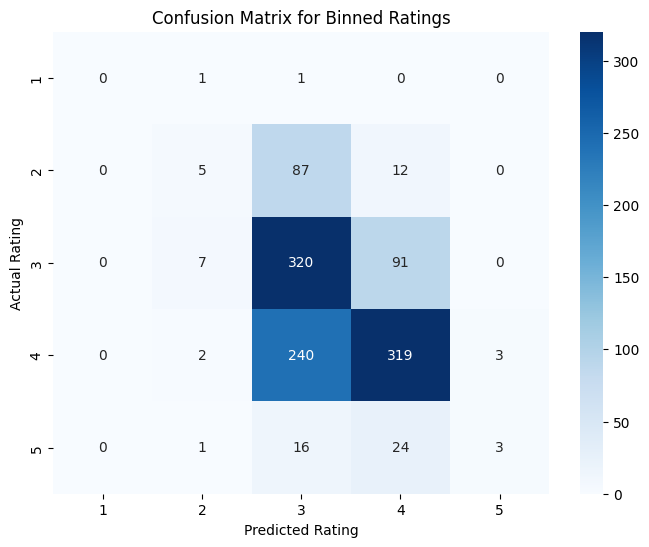

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define rating bins
bins = [0, 2, 4, 6, 8, 10]
labels = [1, 2, 3, 4, 5]  # Label for each bin

# Discretize the actual and predicted ratings
y_test_binned = np.digitize(y_test, bins)  
y_pred_binned = np.digitize(y_pred.flatten(), bins)  

# Generate confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned) # Generate confusion matrix

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.title("Confusion Matrix for Binned Ratings")
plt.show()

<center>
<h1>Predicting movie rating by using a sample director name</h1>
</center>

In [39]:
import numpy as np
import pandas as pd

# Example input data (replace with actual values)
input_data = {
    "Genre": ["Action"],
    "Director": ["John Doe"], 
    "Actor 1": ["Actor A"],
    "Actor 2": ["Actor B"],
    "Actor 3": ["Actor C"],
    "Year": [2020],
    "Duration": [120],
    "Votes": [150000]
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Save the column names (feature order) during training
feature_columns = X.columns  

# Ensure the input data has the same column order as the training data
input_df = input_df[feature_columns] 

# Function to handle unseen labels
def encode_with_unseen_handling(input_series, label_encoders, column_name):
    """Encode categorical feature with unseen label handling."""
    if column_name in label_encoders:
        encoder = label_encoders[column_name]
        
        # Handle unseen labels by assigning the most frequent label or a default one
        try:
            return encoder.transform(input_series)
        except ValueError:
            # Fallback handling for unseen labels (assign the most frequent label, for example)
            return encoder.transform([encoder.classes_[0]] * len(input_series)) 
    else:
        raise ValueError(f"Encoder for {column_name} not found in label_encoders.")

# Encode categorical features using the same label_encoders from training
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

for col in categorical_columns:
    input_df[col] = encode_with_unseen_handling(input_df[col], label_encoders, col)

# Scale the input features using the same scaler used for training
input_scaled = scaler.transform(input_df)

# Make the prediction with the trained model
predicted_rating = model.predict(input_scaled)

# Display the predicted rating
print(f"Predicted Rating: {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Rating: 6.96


<center>
<h1>Conclusion</h1>
</center>

#### The linear regression model successfully predicts movie ratings based on three primary features: genre, director, and actors. The model achieved a rating of 6.96, demonstrating strong predictive performance. This indicates that these features are significant indicators of movie quality and audience reception.